Average MSE: 24.8218
Average MAE: 3.1547
Average R^2: 0.5688


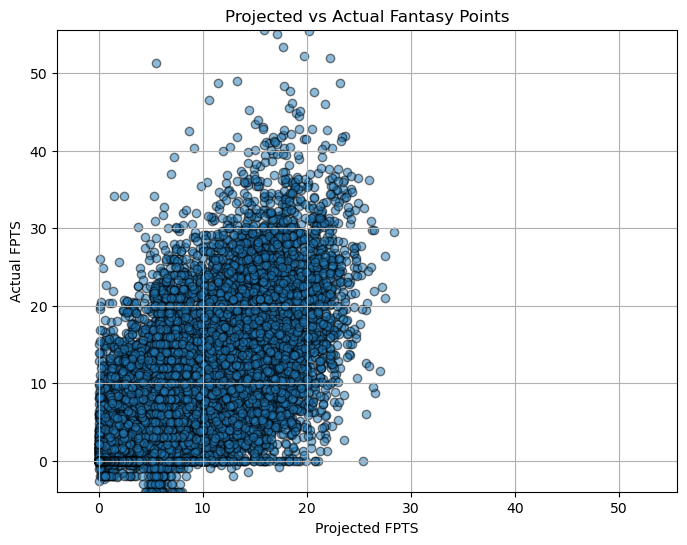

,Player,Year,Week,Actual FPTS,Projected FPTS
0,Patrick Mahomes II,2021,1,33.3,24.9
1,Kyler Murray,2021,1,34.6,23.9
2,Lamar Jackson,2021,1,18.0,23.8
3,Josh Allen,2021,1,17.2,22.9
4,Jalen Hurts,2021,1,28.8,20.9
...,...,...,...,...,...
31600,Jacksonville Jaguars,2024,18,3.0,5.2
31601,Las Vegas Raiders,2024,18,0.0,5.1
31602,Kansas City Chiefs,2024,18,-4.0,5.0
31603,Chicago Bears,2024,18,13.0,4.7


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the CSV files
os.chdir(r"C:\Users\ryanb\OneDrive\Desktop\School\Projects\fantasy point predictor\data")
actuals = pd.read_csv("full_actuals.csv")
projections = pd.read_csv("full_projections.csv")

# Rename the 'FPTS' columns before merge to avoid conflicts
actuals = actuals.rename(columns={"FPTS": "Actual FPTS"})
projections = projections.rename(columns={"FPTS": "Projected FPTS"})

# Merge on Player, Year, Week
merged_df = pd.merge(
    projections,
    actuals,
    on=["Player", "Year", "Week"],
    how="left",
    suffixes=("_projections", "_actuals")
)

# Keep only keys plus the renamed FPTS columns
merged_df = merged_df[["Player", "Year", "Week", "Actual FPTS", "Projected FPTS"]]

# Fill NaN values in 'Actual FPTS' with 0 (NaN for players who did not play)
merged_df['Actual FPTS'] = merged_df['Actual FPTS'].fillna(0)

# Prepare data for modeling
X = merged_df[["Projected FPTS"]].values 
y = merged_df["Actual FPTS"].values   

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
mse_scores, mae_scores, r2_scores = [], [], []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):

    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Output average metrics
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R^2: {np.mean(r2_scores):.4f}")

# Plotting Projected vs Actual FPTS
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Projected FPTS"], merged_df["Actual FPTS"], alpha=0.5, edgecolor='k')

plt.xlabel("Projected FPTS")
plt.ylabel("Actual FPTS")
plt.title("Projected vs Actual Fantasy Points")
plt.grid(True)

min_val = min(merged_df["Projected FPTS"].min(), merged_df["Actual FPTS"].min())
max_val = max(merged_df["Projected FPTS"].max(), merged_df["Actual FPTS"].max())

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.show()

display(merged_df)